<a href="https://colab.research.google.com/github/moxie77/USA-accident_analysis/blob/main/explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('explore-72a2e')
jovian.set_colab_id('1XcxUJilGWoDNtHYl0mu1-_Uj-A11WRPK')

     |████████████████████████████████| 68 kB 3.6 MB/s 


# explore

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/mayowabammy/explore-bdac7


'https://jovian.ai/mayowabammy/explore-bdac7'

In [ ]:
pip install opendatasets --quiet

In [ ]:
import opendatasets as od

In [ ]:
download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adewumimayowa
Your Kaggle Key: ··········


  2%|▏         | 5.00M/290M [00:00<00:07, 42.3MB/s]

100%|██████████| 290M/290M [00:03<00:00, 89.4MB/s]


In [ ]:
data_file = './us-accidents/US_Accidents_Dec20_Updated.csv'

## Exploratory Data Analysis
- Load the file
- Check the information about the dataset
- Look for missing data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [ ]:
df = pd.read_csv(data_file)

In [ ]:
df.head(2)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
#Checking the columns
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
#Check the shape
df.shape

(2906610, 47)

From the above code, we have 2906610 rows and 47 columns(features)

In [ ]:
#Check the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

From the above code, we have 3 major dtypes--- We need to change some, and we need to create new dtypes


In [ ]:
#Check the describtion of the numeric features
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [ ]:
#Checking for the number of each data type----
df_numeric = df.select_dtypes(include='number')
num = len(df_numeric.columns)
print(f'We have {num} numeric columns')

df_obj = df.select_dtypes(include='object')
num_2 = len(df_obj.columns)
print(f'we have {num_2} object columns')

df_bool = df.select_dtypes(include='bool')
num_3 = len(df_bool.columns)
print(f'we have {num_3} boolean columns')

print(f'With a total number of {num + num_2 + num_3} columns')

We have 14 numeric columns
we have 20 object columns
we have 13 boolean columns
With a total number of 47 columns


In [ ]:
#Checking for the percentage of the missing data
percentage_of_missing_data = pd.DataFrame({'Percentage of Missing of Data':round((df.isnull().sum()/len(df.index)) * 100,2)})
percentage_of_missing_data = percentage_of_missing_data.sort_values(by='Percentage of Missing of Data',ascending=False)

In [ ]:
percentage_of_missing_data.head(5)

,Percentage of Missing of Data
Number,65.08
Precipitation(in),44.77
Wind_Chill(F),40.73
Wind_Speed(mph),10.57
End_Lat,9.73


- 65% of Number are missing. That means we can't really get any insight from it.
- 44.8% of Precipitation is missing. We can work with that. We will have to come up with a way to fill the missing data up. Precipitation can't be ignored. 
- We are just going to drop Number 

In [ ]:
df_obj.head(2)

,ID,Start_Time,End_Time,Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2019-05-21 08:29:55,2019-05-21 09:29:40,Accident on Tanner Rd at Pennbrooke Ln.,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,N,Fair,Day,Day,Day,Day
1,A-2,2019-10-07 17:43:09,2019-10-07 19:42:50,Accident on Houston Branch Rd at Providence Br...,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,VAR,Cloudy,Day,Day,Day,Day


Observations
- Note that Date time(dtype) will have to change
- Note that categorical data(dtype) will have to change.
- The Describtion is not going to be useful in this case. Drop it. ---That's because we are not working on a NLP project
- Street might not be necessary.  Drop Street
- The city, the county is located in the state. Let's stick to the state. Drop others 

In [ ]:
#Checking for the unique itmes in Counrty
df.Country.unique()

array(['US'], dtype=object)

Us is the only items in Country. We should drop it. Update the list above. 

In [ ]:
#Checking to see the items in Side
print(df.Side.unique())
print(f'Total number of sides: {len(df.Side.unique())}')

['R' 'L' ' ']
Total number of sides: 3


From the observation above, we have ' '(empty space) has part of the itmes. We should replace it with nan

In [ ]:
#Checking to see the Airport Code
print(df.Airport_Code.unique())
print(f'The total number of Airport: {len(df.Airport_Code.unique())}')

['KGMU' 'KEQY' 'KSJC' ... 'KCOM' 'KSIB' 'KGUY']
The total number of Airport: 2014


In [ ]:
#Checking itmes in Timezones. Take note of categorical data
print(df.Timezone.unique())
print(f"Total number of Timezones is {len(df.Timezone.unique())}")

['US/Eastern' 'US/Pacific' 'US/Mountain' 'US/Central' nan]
Total number of Timezones is 5


In [ ]:
#Checking for items in Wind_Direction
print(df.Wind_Direction.unique())
print(f"Total number of Wind_Direction is {len(df.Wind_Direction.unique())}")

['N' 'VAR' 'W' 'SSW' 'SSE' 'NNW' 'NE' 'E' 'West' 'S' 'Variable' 'WSW' 'SW'
 'ESE' 'South' 'ENE' 'Calm' 'NNE' 'CALM' 'NW' 'East' 'North' 'WNW' 'SE'
 nan]
Total number of Wind_Direction is 25


In [ ]:
#Checking for unique weather conditions
print(df.Weather_Condition.unique())
print(f'The total number of weather condition is {len(df.Weather_Condition.unique())}')

['Fair' 'Cloudy' 'Clear' 'Overcast' 'Light Snow' 'Mostly Cloudy'
 'Partly Cloudy' 'Scattered Clouds' 'Wintry Mix' 'Shallow Fog' 'Fog'
 'Haze' nan 'Light Rain' 'Smoke' 'Rain' 'Cloudy / Windy' 'Light Drizzle'
 'Heavy Snow' 'Snow' 'Thunderstorm' 'Light Rain Shower' 'Heavy Rain'
 'Mist' 'Thunderstorms and Rain' 'Fair / Windy' 'Light Freezing Rain'
 'Light Thunderstorms and Rain' 'Light Snow / Windy'
 'Thunder in the Vicinity' 'Drizzle' 'Rain / Windy' 'Thunder'
 'Drizzle and Fog' 'Heavy Thunderstorms and Rain' 'T-Storm'
 'Light Rain with Thunder' 'Partly Cloudy / Windy' 'Patches of Fog'
 'Mostly Cloudy / Windy' 'Haze / Windy' 'Heavy T-Storm'
 'Light Rain / Windy' 'Blowing Snow' 'Light Freezing Fog'
 'Light Freezing Drizzle' 'Small Hail' 'Widespread Dust' 'Heavy Drizzle'
 'Heavy Rain / Windy' 'Heavy T-Storm / Windy' 'Snow / Windy'
 'Light Blowing Snow' 'Showers in the Vicinity' 'Fog / Windy' 'Sleet'
 'Light Ice Pellets' 'Blowing Dust / Windy' 'Smoke / Windy'
 'T-Storm / Windy' 'Ice Pellets' 

In [ ]:
#Checking for the number of states
print(df.State.unique())
print(f"The total number of recorded state: {len(df.State.unique())}")

['SC' 'NC' 'CA' 'NV' 'FL' 'CO' 'TN' 'NY' 'TX' 'AZ' 'NJ' 'MI' 'GA' 'VA'
 'IN' 'LA' 'PA' 'MN' 'OH' 'MD' 'CT' 'IL' 'MO' 'OR' 'NE' 'OK' 'UT' 'WA'
 'AL' 'WI' 'MA' 'DC' 'MS' 'KS' 'KY' 'ME' 'IA' 'WV' 'AR' 'ID' 'RI' 'WY'
 'NM' 'MT' 'NH' 'DE' 'ND' 'SD' 'VT']
The total number of recorded state: 49


In [ ]:
#Checking for how they correlate---- Create a new dataframe to isolate the itmes 
twilight_corr = df[['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']]

In [ ]:
twilight_corr.head(5)

,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,Day,Day,Day,Day
1,Day,Day,Day,Day
2,Night,Night,Night,Night
3,Day,Day,Day,Day
4,Day,Day,Day,Day


From the above table, from the glance look, day is consistent in all columns and Night is the same. Note, that's not enough to conclude. We don't have the total look of the dataset. One way to go about this is to change it to numbers and find the correlation. 

In [ ]:
#Getting dummies for each data point
twilight = pd.get_dummies(twilight_corr)

In [ ]:
twilight

,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Civil_Twilight_Day,Civil_Twilight_Night,Nautical_Twilight_Day,Nautical_Twilight_Night,Astronomical_Twilight_Day,Astronomical_Twilight_Night
0,1,0,1,0,1,0,1,0
1,1,0,1,0,1,0,1,0
2,0,1,0,1,0,1,0,1
3,1,0,1,0,1,0,1,0
4,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
2906605,1,0,1,0,1,0,1,0
2906606,0,1,0,1,0,1,0,1
2906607,1,0,1,0,1,0,1,0
2906608,0,1,0,1,0,1,0,1


In [ ]:
#Let's separate the day from night to have better grouping
twilight_day = twilight[['Sunrise_Sunset_Day','Civil_Twilight_Day','Nautical_Twilight_Day','Astronomical_Twilight_Day']]

In [ ]:
twilight_day

,Sunrise_Sunset_Day,Civil_Twilight_Day,Nautical_Twilight_Day,Astronomical_Twilight_Day
0,1,1,1,1
1,1,1,1,1
2,0,0,0,0
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
2906605,1,1,1,1
2906606,0,0,0,0
2906607,1,1,1,1
2906608,0,0,0,0


In [ ]:
twilight_night = twilight[['Sunrise_Sunset_Night','Civil_Twilight_Night','Nautical_Twilight_Night','Astronomical_Twilight_Night']]

In [ ]:
twilight_night

,Sunrise_Sunset_Night,Civil_Twilight_Night,Nautical_Twilight_Night,Astronomical_Twilight_Night
0,0,0,0,0
1,0,0,0,0
2,1,1,1,1
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
2906605,0,0,0,0
2906606,1,1,1,1
2906607,0,0,0,0
2906608,1,1,1,1


In [ ]:
#Checking for day correlation
twilight_day = twilight_day.corr()

In [ ]:
twilight_day

,Sunrise_Sunset_Day,Civil_Twilight_Day,Nautical_Twilight_Day,Astronomical_Twilight_Day
Sunrise_Sunset_Day,1.000000,0.898599,0.794332,0.707199
Civil_Twilight_Day,0.898599,1.000000,0.883924,0.787076
Nautical_Twilight_Day,0.794332,0.883924,1.000000,0.890480
Astronomical_Twilight_Day,0.707199,0.787076,0.890480,1.000000


In [ ]:
#Checking for night correlation
twilight_night = twilight_night.corr()

In [ ]:
twilight_night

,Sunrise_Sunset_Night,Civil_Twilight_Night,Nautical_Twilight_Night,Astronomical_Twilight_Night
Sunrise_Sunset_Night,1.000000,0.898592,0.794317,0.707175
Civil_Twilight_Night,0.898592,1.000000,0.883914,0.787055
Nautical_Twilight_Night,0.794317,0.883914,1.000000,0.890467
Astronomical_Twilight_Night,0.707175,0.787055,0.890467,1.000000


From the above observation, both day and night items are highly correlated. This means there is a hight level that they all predict each other.  we can drop all except one that will be used in the analysis. 

In [ ]:
len(df.ID.unique())

2906610

Note: Each ID represent a unique case of accident.  We have looked through the datasets and we can now start answersing questions

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
#Drop Colums that needs to be dropped. 
df.drop(columns=['Number','Country','Description','City','Zipcode','Astronomical_Twilight','Civil_Twilight','Nautical_Twilight'],inplace=True)

- We are dropping Number because more than 50% is missing
- We are dropping country because the accidents all happened in the same Country
- We are dropping Description because we are not working on a NLP project
- We are dropping Zipcode because they rep each state
- We are dropping Astronomical_Twilight, Civil_Twilight,Nautical_Twilight because they are highly correlated with sunrise_sunset.... We should use just onr of them. They predict each other

In [ ]:
df.head(2)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,Side,County,State,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Tanner Rd,R,Greenville,SC,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Providence Branch Ln,R,Mecklenburg,NC,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day


To make things easy, we are going to group into date, category, numeric and boolean. In Respect with ID

In [ ]:
#For the Data DataFrame--- 
date_DataFrame = df[['ID','Start_Time','End_Time','Weather_Timestamp']]

#For the numeric DataFrame---
number_DataFrame = df[['ID',
                       'Start_Lat',
                       'Start_Lng',
                       'End_Lat',
                       'End_Lng',
                       'Distance(mi)',
                       'Temperature(F)',
                       'Wind_Chill(F)',
                       'Humidity(%)',
                       'Pressure(in)',
                       'Visibility(mi)',
                       'Wind_Speed(mph)',
                       'Precipitation(in)']]

#The DataFrame for the categorical Data
Cat_DataFrame = df[['ID','Side','State','Timezone','Wind_Direction','Weather_Condition','Severity']]

#The DataFrame for Boolean Data
bool_DataFrame = df[['ID',
                     'Amenity',
                     'Bump',
                     'Crossing',
                     'Give_Way',
                     'Junction',
                     'No_Exit',
                     'Railway',
                     'Roundabout',
                     'Station',
                     'Stop',
                     'Traffic_Calming',
                     'Traffic_Signal',
                     'Turning_Loop']]

Now that we have divided it into different groups, let's make sure the dtype is changed(Where necessary) 

In [ ]:
date_DataFrame.head(5)

,ID,Start_Time,End_Time,Weather_Timestamp
0,A-1,2019-05-21 08:29:55,2019-05-21 09:29:40,2019-05-21 08:53:00
1,A-2,2019-10-07 17:43:09,2019-10-07 19:42:50,2019-10-07 17:53:00
2,A-3,2020-12-13 21:53:00,2020-12-13 22:44:00,2020-12-13 21:53:00
3,A-4,2018-04-17 16:51:23,2018-04-17 17:50:46,2018-04-17 16:55:00
4,A-5,2016-08-31 17:40:49,2016-08-31 18:10:49,2016-08-31 17:53:00


In [ ]:
#Checking the dtype of the dates
date_DataFrame.dtypes

ID                   object
Start_Time           object
End_Time             object
Weather_Timestamp    object
dtype: object

From the above code, we need to change the type of date to a datetype object

In [ ]:
#Transform to datetime obeject
date_DataFrame['Start_Time'] = pd.to_datetime(date_DataFrame['Start_Time'], format='%Y-%m-%d')
date_DataFrame['End_Time'] = pd.to_datetime(date_DataFrame['End_Time'], format='%Y-%m-%d')
date_DataFrame['Weather_Timestamp'] = pd.to_datetime(date_DataFrame['Weather_Timestamp'], format='%Y-%m-%d')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
#Creating the year, month, day from the date dataframe
date_DataFrame['Year'] = date_DataFrame['Start_Time'].dt.year 
date_DataFrame['Month'] = date_DataFrame['Start_Time'].dt.month
date_DataFrame['Day'] = date_DataFrame['Start_Time'].dt.day
date_DataFrame['sTime'] = date_DataFrame['Start_Time'].dt.time
date_DataFrame['eTime'] = date_DataFrame['End_Time'].dt.time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
date_DataFrame.head(5)

,ID,Start_Time,End_Time,Weather_Timestamp,Year,Month,Day,sTime,eTime
0,A-1,2019-05-21 08:29:55,2019-05-21 09:29:40,2019-05-21 08:53:00,2019,5,21,08:29:55,09:29:40
1,A-2,2019-10-07 17:43:09,2019-10-07 19:42:50,2019-10-07 17:53:00,2019,10,7,17:43:09,19:42:50
2,A-3,2020-12-13 21:53:00,2020-12-13 22:44:00,2020-12-13 21:53:00,2020,12,13,21:53:00,22:44:00
3,A-4,2018-04-17 16:51:23,2018-04-17 17:50:46,2018-04-17 16:55:00,2018,4,17,16:51:23,17:50:46
4,A-5,2016-08-31 17:40:49,2016-08-31 18:10:49,2016-08-31 17:53:00,2016,8,31,17:40:49,18:10:49


In [ ]:
#We have extracted the necessary items from thoes date. We can now drop what we might not need
date_DataFrame.drop(columns=['Start_Time','End_Time','Weather_Timestamp','sTime','eTime'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
date_DataFrame.head(5)

,ID,Year,Month,Day
0,A-1,2019,5,21
1,A-2,2019,10,7
2,A-3,2020,12,13
3,A-4,2018,4,17
4,A-5,2016,8,31


In [ ]:
#Year with the highest number of Accidents
accidents_by_year = pd.DataFrame(date_DataFrame.groupby('Year')['ID'].count())
accidents_by_year.reset_index(inplace=True)

In [ ]:
accidents_by_year

,Year,ID
0,2016,270881
1,2017,448268
2,2018,535921
3,2019,617712
4,2020,1033828


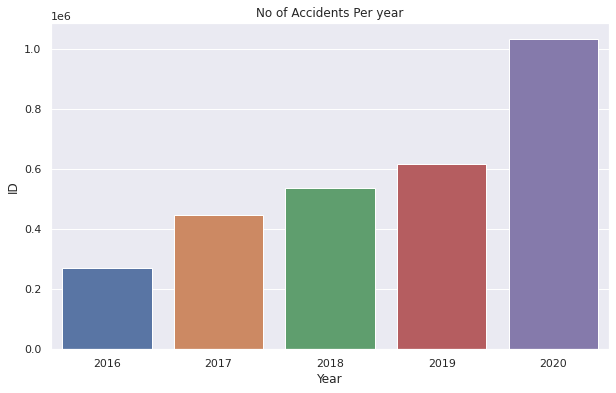

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=accidents_by_year, x='Year', y='ID')
plt.title("No of Accidents Per year")

plt.show()

From the above analysis, most accident was recorded in the year 2020

In [ ]:
#Months with the highest number of Accidents
accidents_by_months = pd.DataFrame(date_DataFrame.groupby('Month')['ID'].count())
accidents_by_months.reset_index(inplace=True)

In [ ]:
accidents_by_months

,Month,ID
0,1,198485
1,2,186660
2,3,197969
3,4,205487
4,5,204889
5,6,214558
6,7,157112
7,8,196597
8,9,255159
9,10,326430


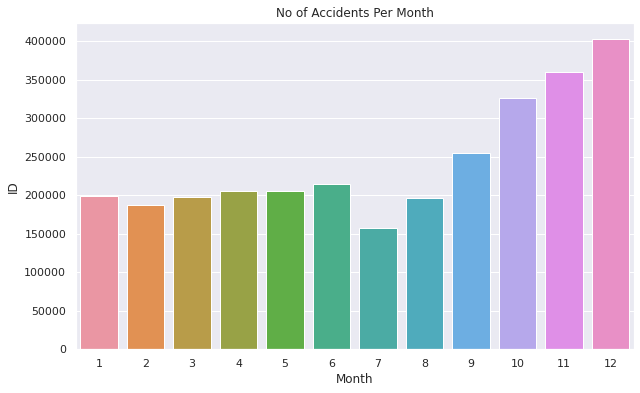

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=accidents_by_months, x='Month', y='ID')
plt.title("No of Accidents Per Month")

plt.show()

Most accident happen in December. Basically, most accidents happen towards the end of the year. 

In [ ]:
Cat_DataFrame.head(5)

,ID,Side,State,Timezone,Wind_Direction,Weather_Condition,Severity
0,A-1,R,SC,US/Eastern,N,Fair,2
1,A-2,R,NC,US/Eastern,VAR,Cloudy,2
2,A-3,R,CA,US/Pacific,W,Fair,2
3,A-4,R,NV,US/Pacific,SSW,Clear,2
4,A-5,R,FL,US/Eastern,SSE,Overcast,3


In [ ]:
Cat_DataFrame['Side'] = Cat_DataFrame.Side.astype('category')
Cat_DataFrame['State'] = Cat_DataFrame.State.astype('category')
Cat_DataFrame['Timezone'] = Cat_DataFrame.Timezone.astype('category')
Cat_DataFrame['Wind_Direction'] = Cat_DataFrame.Wind_Direction.astype('category')
Cat_DataFrame['Weather_Condition'] = Cat_DataFrame.Weather_Condition.astype('category')
Cat_DataFrame['Severity'] = Cat_DataFrame.Severity.astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
Cat_DataFrame.dtypes

ID                     object
Side                 category
State                category
Timezone             category
Wind_Direction       category
Weather_Condition    category
Severity             category
dtype: object

In [ ]:
Cat_DataFrame.shape

(2906610, 7)

In [ ]:
Cat_DataFrame.Side.unique()

['R', 'L', ' ']
Categories (3, object): ['R', 'L', ' ']

We need to remove the space in the side column. 

In [ ]:
Cat_DataFrame['Side'] = Cat_DataFrame['Side'].replace(' ',np.nan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Cat_DataFrame.dropna(axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Cat_DataFrame.Side.unique()

['R', 'L']
Categories (2, object): ['R', 'L']

In [ ]:
#Year with the highest number of Accidents
accidents_by_side = pd.DataFrame(Cat_DataFrame.groupby('Side')['ID'].count())
accidents_by_side.reset_index(inplace=True)

accidents_by_side['Percentage %'] = round((accidents_by_side['ID']/accidents_by_side['ID'].sum()) * 100,2)

In [ ]:
accidents_by_side

,Side,ID,Percentage %
0,L,483658,17.13
1,R,2340125,82.87


In [ ]:
accidents_by_states = pd.DataFrame(Cat_DataFrame.groupby('State')['ID'].count())
accidents_by_states.reset_index(inplace=True)
accidents_by_states['Percentage %'] = round((accidents_by_states['ID']/accidents_by_states['ID'].sum()) *100,2)


In [ ]:
accidents_by_states = accidents_by_states.sort_values(by='ID',ascending=False)

In [ ]:
accidents_by_states.head(10)

,State,ID,Percentage %
3,CA,709819,25.14
8,FL,258970,9.17
41,TX,221340,7.84
32,NY,123885,4.39
25,NC,121373,4.30
38,SC,117897,4.18
35,OR,96210,3.41
36,PA,88083,3.12
43,VA,83493,2.96
12,IL,77075,2.73


Most accidents occurs in CA.... 

In [ ]:
accidents_by_tz = pd.DataFrame(Cat_DataFrame.groupby('Timezone')['ID'].count())
accidents_by_tz.reset_index(inplace=True)
accidents_by_tz['Percentage %'] = round((accidents_by_tz['ID']/accidents_by_tz['ID'].sum()) *100,2)


In [ ]:
accidents_by_tz

,Timezone,ID,Percentage %
0,US/Central,616368,21.83
1,US/Eastern,1181744,41.85
2,US/Mountain,159432,5.65
3,US/Pacific,866239,30.68


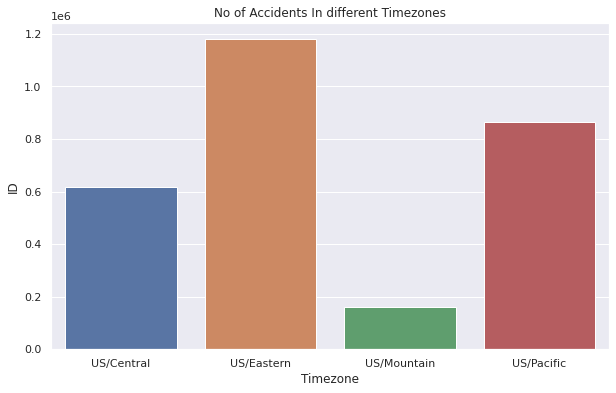

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=accidents_by_tz, x='Timezone', y='ID')
plt.title("No of Accidents In different Timezones")

plt.show()

In [ ]:
accidents_by_wd = pd.DataFrame(Cat_DataFrame.groupby('Wind_Direction')['ID'].count())
accidents_by_wd.reset_index()

accidents_by_wd['Percentage'] = round(accidents_by_wd.ID / accidents_by_wd.ID.sum() * 100, 2)

In [ ]:
accidents_by_wd.sort_values(by='ID', ascending= False, inplace=True)

In [ ]:
accidents_by_wd

,ID,Percentage
Wind_Direction,,
CALM,295664,10.47
Calm,224526,7.95
WNW,142115,5.03
SSW,140222,4.97
NW,137962,4.89
SW,132558,4.69
WSW,131141,4.64
SSE,130100,4.61
NNW,124430,4.41


In [ ]:
accidents_by_wc = pd.DataFrame(Cat_DataFrame.groupby('Weather_Condition')['ID'].count())
accidents_by_wc.reset_index()

,Weather_Condition,ID
0,Blowing Dust,99
1,Blowing Dust / Windy,104
2,Blowing Sand,1
3,Blowing Snow,255
4,Blowing Snow / Windy,70
...,...,...
123,Volcanic Ash,11
124,Widespread Dust,97
125,Widespread Dust / Windy,1
126,Wintry Mix,1875


In [ ]:
accidents_by_wc['Percentage'] = round(accidents_by_wc.ID / accidents_by_wc.ID.sum() * 100, 2)

In [ ]:
accidents_by_wc.sort_values(by='ID', ascending=False)

,ID,Percentage
Weather_Condition,,
Fair,686616,24.32
Clear,498920,17.67
Mostly Cloudy,385165,13.64
Partly Cloudy,267779,9.48
Cloudy,243551,8.62
...,...,...
Freezing Rain / Windy,1,0.00
Heavy Smoke,1,0.00
Sleet / Windy,1,0.00


For some weird reasons, most accident occurs when the weather condition is Fair and clear.... People are more careful when it's cloudy and when there's some sort of issue with the weather. 

In [ ]:
number_DataFrame.head(5)

,ID,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,A-1,34.808868,-82.269157,34.808868,-82.269157,0.0,76.0,76.0,52.0,28.91,10.0,7.0,0.0
1,A-2,35.090080,-80.745560,35.090080,-80.745560,0.0,76.0,76.0,62.0,29.30,10.0,3.0,0.0
2,A-3,37.145730,-121.985052,37.165850,-121.988062,1.4,51.0,51.0,80.0,30.17,10.0,6.0,0.0
3,A-4,39.110390,-119.773781,39.110390,-119.773781,0.0,53.6,NaN,16.0,30.16,10.0,4.6,NaN
4,A-5,26.102942,-80.265091,26.102942,-80.265091,0.0,84.2,NaN,84.0,29.92,10.0,13.8,NaN


In [ ]:
num_per = pd.DataFrame({"Percentage of Missing Data":round(number_DataFrame.isnull().sum()/len(number_DataFrame.index) * 100, 2)})

In [ ]:
num_per

,Percentage of Missing Data
ID,0.00
Start_Lat,0.00
Start_Lng,0.00
End_Lat,9.73
End_Lng,9.73
Distance(mi),0.00
Temperature(F),2.31
Wind_Chill(F),40.73
Humidity(%),2.45
Pressure(in),1.96


In [ ]:
number_DataFrame['Distance(mi)'].max()

333.63000488299997

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


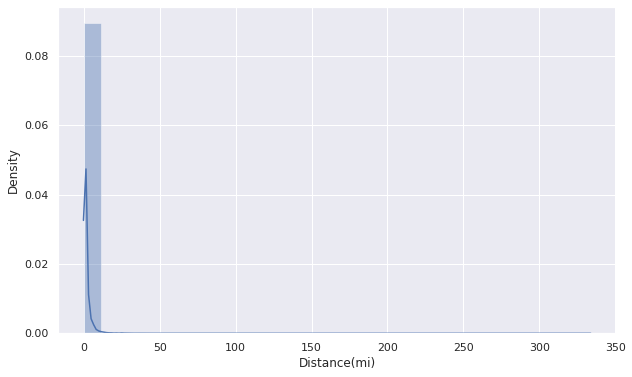

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(a=number_DataFrame['Distance(mi)'], bins=30)
plt.show()

Most accident occured in short distance. The above graph is skewed to the right. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


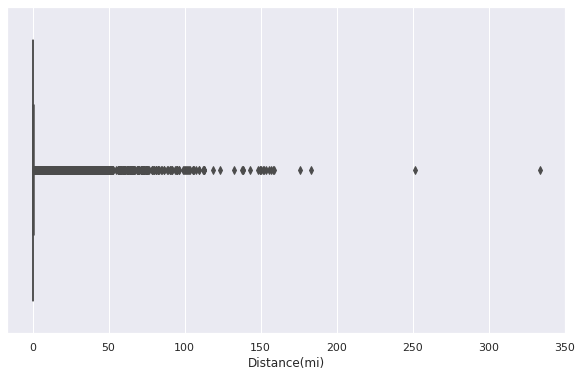

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(number_DataFrame['Distance(mi)'])
plt.show()

We have our outliers at the right. 

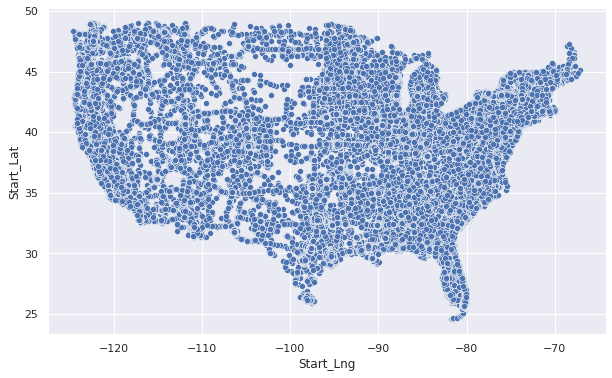

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=number_DataFrame.Start_Lng, y=number_DataFrame.Start_Lat)
plt.show()

The above is the datapoint of each accident. 

In [ ]:
number_DataFrame['Temperature(F)'].min()

-89.0

In [ ]:
number_DataFrame['Temperature(F)'].median()

63.0

In [ ]:
number_DataFrame['Temperature(F)'].max()

203.0

In [ ]:
temp = number_DataFrame[['ID','Temperature(F)']]

In [ ]:
temp.head(5)

,ID,Temperature(F)
0,A-1,76.0
1,A-2,76.0
2,A-3,51.0
3,A-4,53.6
4,A-5,84.2


In [ ]:
temp['Temperature(F)'].fillna(temp['Temperature(F)'].mean())

0          76.0
1          76.0
2          51.0
3          53.6
4          84.2
           ... 
2906605    84.2
2906606    46.9
2906607    76.0
2906608    27.0
2906609    51.1
Name: Temperature(F), Length: 2906610, dtype: float64

In [ ]:
#A function that shares the tempreture into different category. 
def get_cat(x, low = -89.0, mid=63.0 ):
  if x >= low and x <= 0:
    return "Very Cold"
  elif x > 0 and x <= mid:
    return "Cold"
  elif x > mid and x <= 140:
    return "Warm"
  else:
    return "Very Warm" 

In [ ]:
#Applying the function
temp['Cat'] = temp['Temperature(F)'].apply(get_cat)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
temp.head(5)

,ID,Temperature(F),Cat
0,A-1,76.0,Warm
1,A-2,76.0,Warm
2,A-3,51.0,Cold
3,A-4,53.6,Cold
4,A-5,84.2,Warm


In [ ]:
Temp = pd.DataFrame(temp.groupby('Cat')['ID'].count())

In [ ]:
Temp.reset_index(inplace=True)

In [ ]:
Temp['Percent'] = round(Temp.ID / Temp.ID.sum() * 100, 2)

In [ ]:
Temp

,Cat,ID,Percent
0,Cold,1468564,50.52
1,Very Cold,5398,0.19
2,Very Warm,67229,2.31
3,Warm,1365419,46.98


Most Accident occurs whenever the weather is cold and warm. When it is very cold and very warm, people are likely to stay indoor. 

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="explore")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
